In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Check for missing values
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [10]:
# Check column names and types
print(df.info())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert dates
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Feature: Waiting Days
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Drop rows with invalid waiting days
df = df[df['WaitingDays'] >= 0]

# Convert target variable to binary
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [14]:
print(df.describe())
print(df['No-show'].value_counts(normalize=True))  # Class imbalance check



          PatientId  AppointmentID           Age   Scholarship  Hipertension  \
count  7.195900e+04   7.195900e+04  71959.000000  71959.000000  71959.000000   
mean   1.452606e+14   5.655042e+06     38.502564      0.092706      0.208897   
std    2.535667e+14   7.472189e+04     22.925421      0.290021      0.406523   
min    3.921784e+04   5.030230e+06      0.000000      0.000000      0.000000   
25%    3.968099e+12   5.617796e+06     19.000000      0.000000      0.000000   
50%    2.991891e+13   5.661165e+06     39.000000      0.000000      0.000000   
75%    9.371660e+13   5.707178e+06     57.000000      0.000000      0.000000   
max    9.999320e+14   5.784985e+06    115.000000      1.000000      1.000000   

           Diabetes    Alcoholism       Handcap  SMS_received       No-show  \
count  71959.000000  71959.000000  71959.000000  71959.000000  71959.000000   
mean       0.074723      0.025320      0.020025      0.493086      0.285190   
std        0.262946      0.157096      0.1

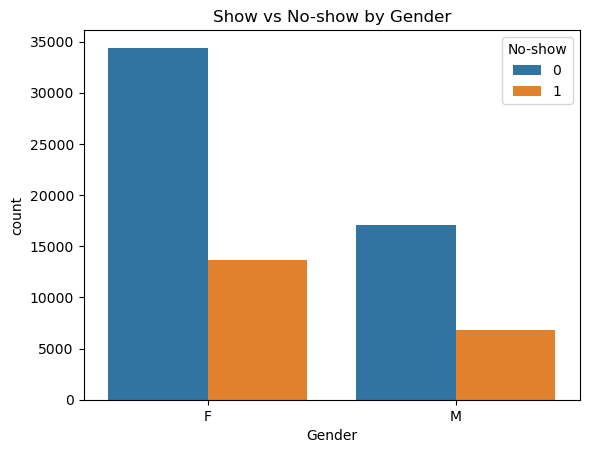

In [34]:
sns.countplot(data=df, x='Gender', hue='No-show')
plt.title("Show vs No-show by Gender")
plt.show()


The chart "Show vs No-show by Gender" shows that female patients have a higher number of total appointments compared to males.
However, the proportion of no-shows is quite similar between both genders,
indicating that gender does not significantly impact the likelihood of missing an appointment.

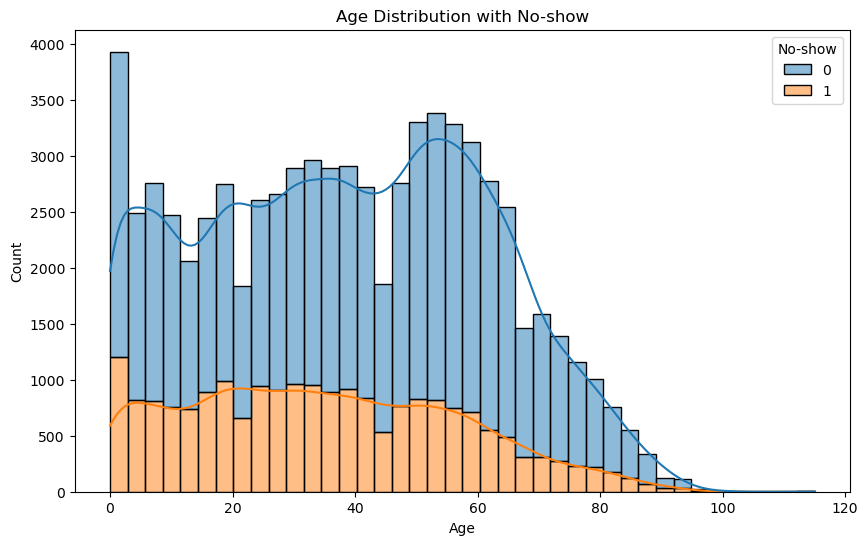

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', bins=40, kde=True, hue='No-show', multiple='stack')
plt.title("Age Distribution with No-show")
plt.show()


The "Age Distribution with No-show" chart reveals that younger patients, 
particularly those under 20 years old, are more likely to miss their appointments.
In contrast, older patients, especially those above 60, tend to show up more consistently. 
This suggests that age plays a role in appointment adherence, with younger individuals being less reliable.

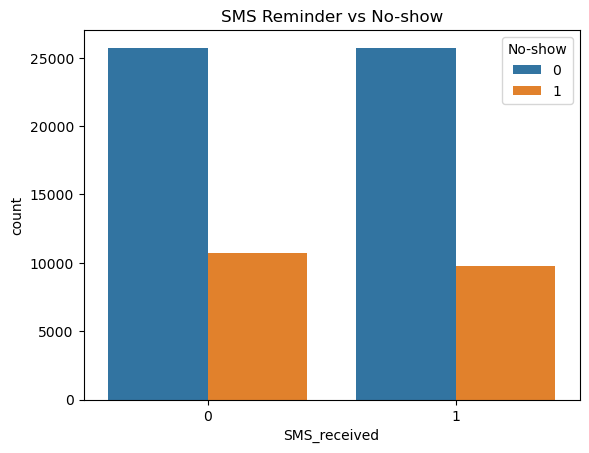

In [20]:
sns.countplot(data=df, x='SMS_received', hue='No-show')
plt.title("SMS Reminder vs No-show")
plt.show()


The "SMS Reminder vs No-show" chart indicates that a large number of patients who received an SMS reminder still did not attend their appointments. 
Interestingly, the no-show rate is slightly higher among those who received SMS, 
suggesting that reminders alone may not be effective in reducing no-shows and other factors may play a more significant role.

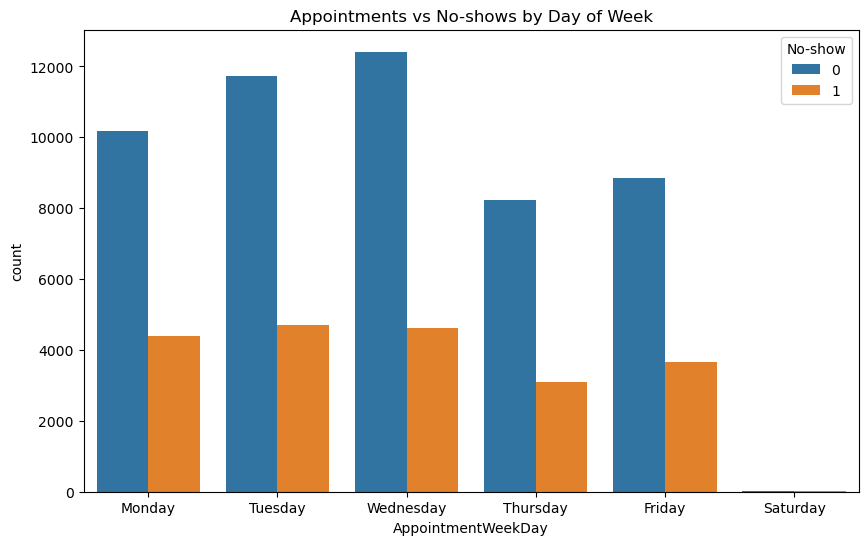

In [22]:
df['AppointmentWeekDay'] = df['AppointmentDay'].dt.day_name()
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='AppointmentWeekDay', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], hue='No-show')
plt.title("Appointments vs No-shows by Day of Week")
plt.show()


The "Appointments vs No-shows by Day of Week" chart shows that most appointments are scheduled between Monday and Friday, with Wednesday having the highest volume. 
The no-show rate appears relatively consistent across the week, though it slightly increases on Friday, suggesting end-of-week fatigue or scheduling conflicts may affect attendance.

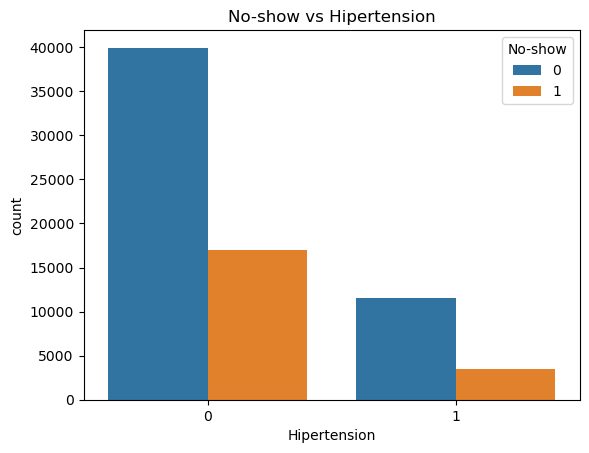

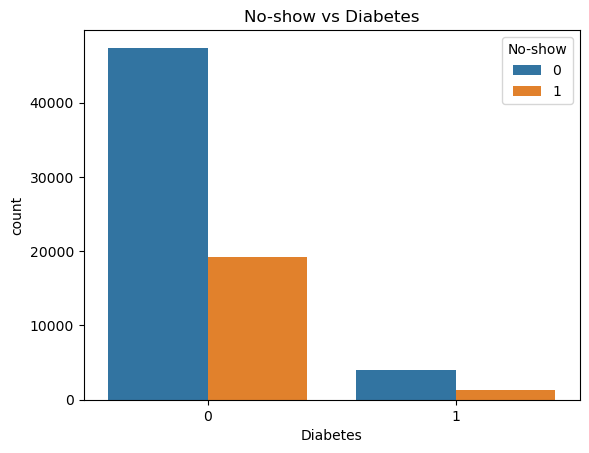

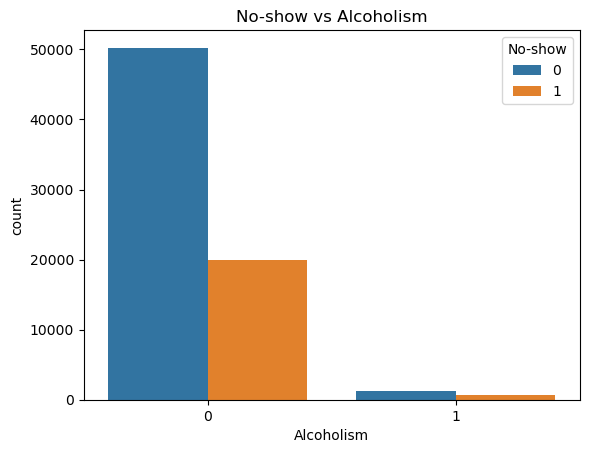

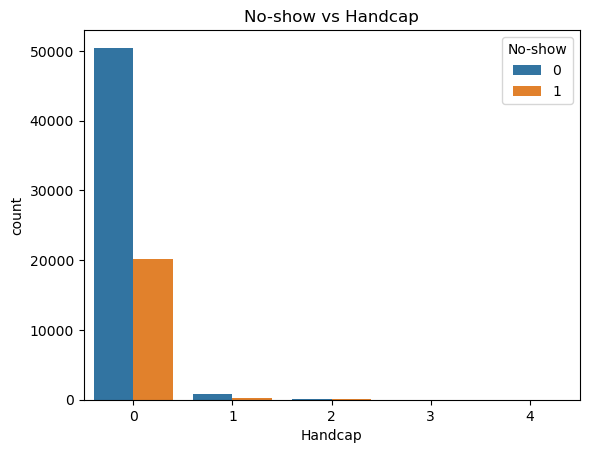

In [24]:
features = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
for col in features:
    sns.countplot(data=df, x=col, hue='No-show')
    plt.title(f"No-show vs {col}")
    plt.show()


The series of "No-show vs Condition" charts show that patients with chronic conditions like hypertension and diabetes are slightly more likely to attend their appointments compared to those without these conditions. 
For alcoholism and handicap, the no-show rates do not show a significant variation. 
This suggests that patients with certain health risks may be more committed to keeping their appointments.

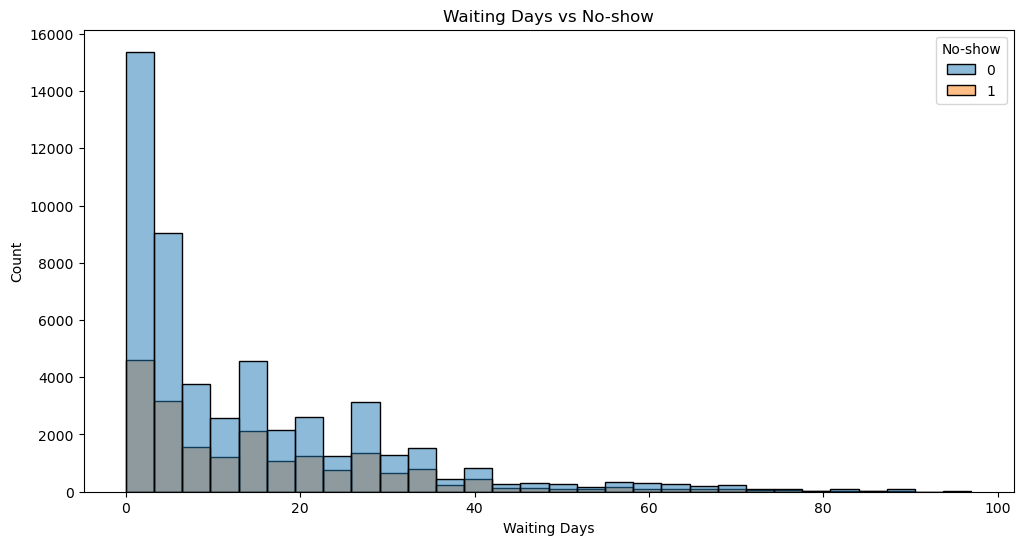

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['WaitingDays'] < 100], x='WaitingDays', hue='No-show', bins=30, kde=False)
plt.title("Waiting Days vs No-show")
plt.xlabel("Waiting Days")
plt.ylabel("Count")
plt.show()


The "Waiting Days vs No-show" chart shows that patients with shorter waiting times between scheduling and appointment day are more likely to attend.
As the number of waiting days increases, the likelihood of no-shows also increases, indicating that longer gaps may lead to forgetfulness or decreased urgency to attend.

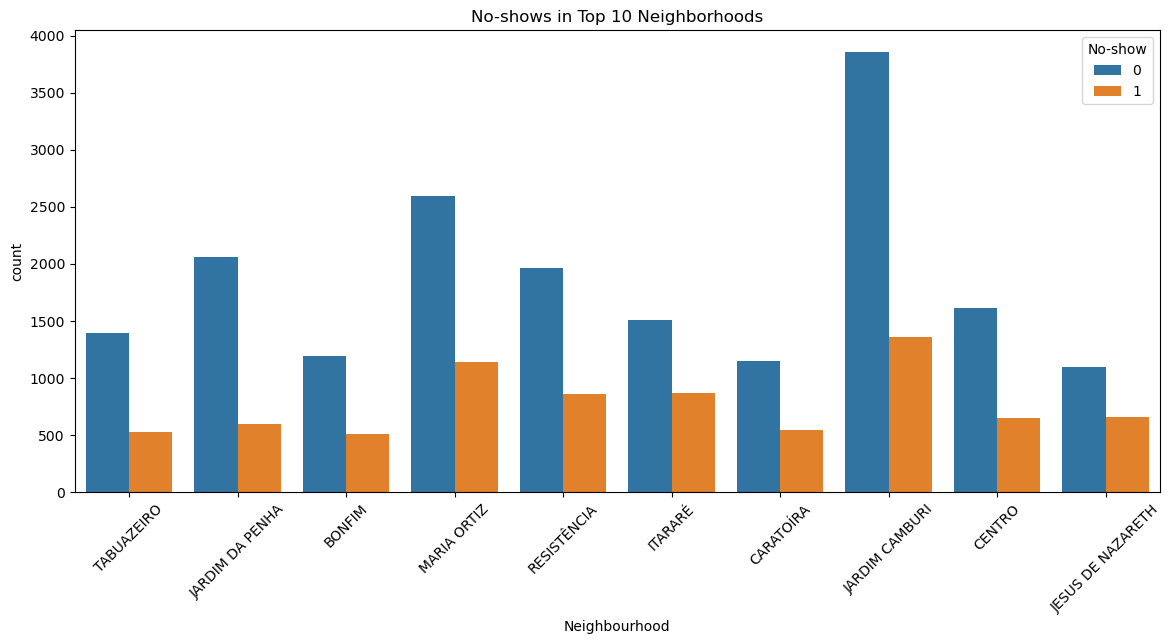

In [28]:
top10 = df['Neighbourhood'].value_counts().head(10).index
subset = df[df['Neighbourhood'].isin(top10)]
plt.figure(figsize=(14,6))
sns.countplot(data=subset, x='Neighbourhood', hue='No-show')
plt.title("No-shows in Top 10 Neighborhoods")
plt.xticks(rotation=45)
plt.show()


The "No-shows in Top 10 Neighborhoods" chart reveals that certain neighborhoods have a higher overall volume of appointments, and among them, the no-show rates vary noticeably.
Some areas like JARDIM CAMBURI and MARIA ORTIZ show a relatively better attendance rate, while others have more pronounced no-show counts, suggesting that geographic or socio-economic factors might influence patient reliability.

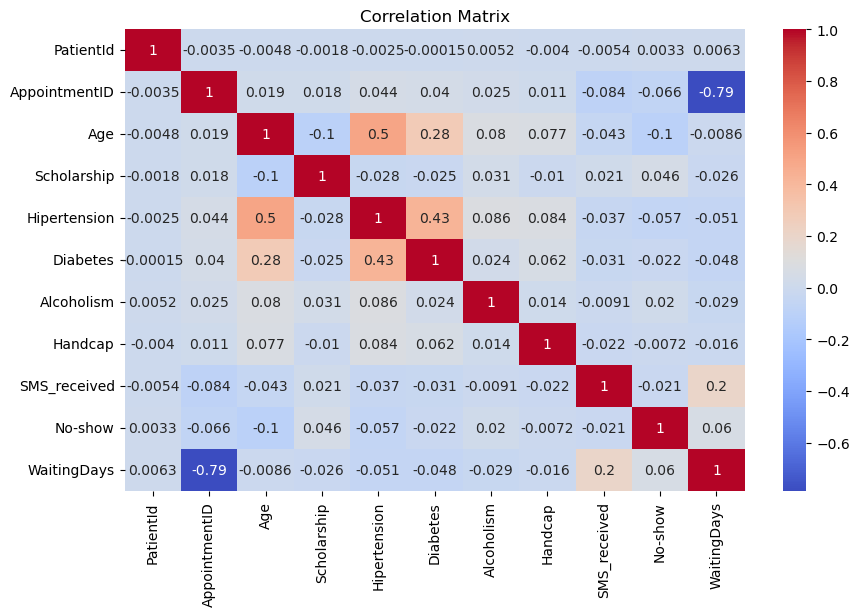

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


The "Correlation Matrix" heatmap shows that most variables have very weak correlations with the target variable (No-show).
Waiting days, age, and chronic conditions like hypertension have only minor influence on whether a patient will attend.
This suggests that no single factor strongly predicts no-shows, and a combination of features or more advanced modeling may be necessary to accurately forecast patient behavior.